# Autoencoder 

- REdução de Dimensionalidade 
- PCA
- Classificação auxiliada com PCA
- Exemplo de Autoencoder para MNIST
- Exercícios




In [8]:
import torch
import torch.nn as nn 
class Autoencoder(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(in_features=kwargs["input_shape"], out_features=128)
        self.encoder_output_layer = nn.Linear(in_features=128, out_features=128)
        self.decoder_hidden_layer = nn.Linear(in_features=128, out_features=128)
        self.decoder_output_layer = nn.Linear(in_features=128, out_features=kwargs["input_shape"])

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

ImportError: No module named torch

In [9]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

import numpy as np 
import matplotlib.pyplot as plt 
from random import randint 
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D 
from tensorflow.keras.models import Model 
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(10)

from time import time
import numpy as np
import tensorflow.keras.backend as K
#from tensorflow.keras.engine.topology import Layer, InputSpec
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import callbacks

from tensorflow.keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

((60000, 28, 28), (10000, 28, 28))


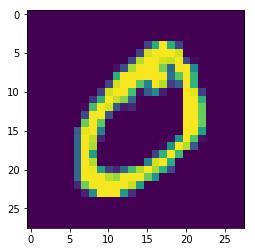

In [15]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

print(x_train.shape, x_test.shape)
image = x_train[1] 
plt.imshow(image) 
plt.show()

In [22]:
x_train



array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 